In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np



In [5]:
# Chargement des données
catalogue=pd.read_csv("C:/Users/hp/Documents/Cour_M1/Warehouse&BI/projet_data_mining/Catalogue.csv",encoding="latin1")
catalogue_neuf = catalogue[catalogue["occasion"] == False].copy()

In [8]:
# Transformation de la longueur
length_mapping = {'très longue':4, 'longue':3, 'moyenne':2, 'courte':1}
catalogue_neuf['longueur_num'] = catalogue_neuf['longueur'].map(length_mapping)

In [10]:
# Sélection des features
features = ["puissance", "nbPlaces", "nbPortes", "prix", "longueur_num"]
X=catalogue_neuf[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\hp\anaconda3\envs\TP_datascience\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\envs\TP_datascience\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\envs\TP_datascience\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\envs\TP_datascience\Lib\site-packages\sklearn\cluster\_kmeans.p

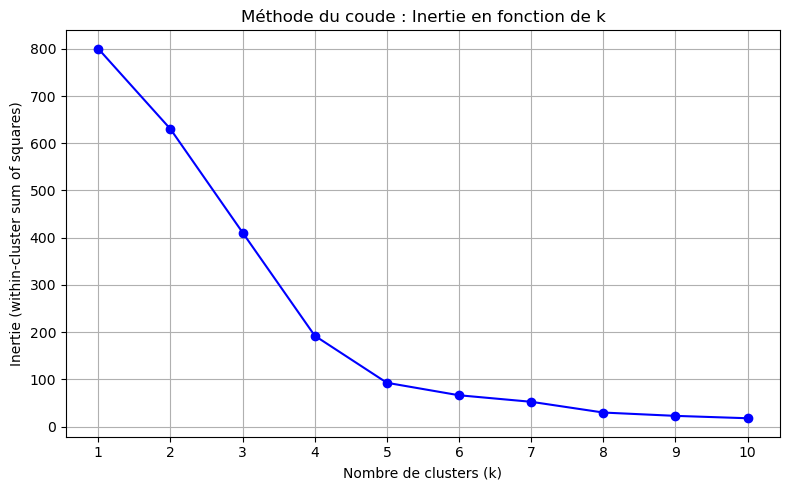

In [12]:
#Détermination du meilleur K avec silhoutte scrore 
inertias = []
range_k = range(1, 11)  # on teste k de 1 à 10

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    
#visualisation du K 
plt.figure(figsize=(8, 5))
plt.plot(range_k, inertias, marker='o', linestyle='-', color='blue')
plt.title("Méthode du coude : Inertie en fonction de k")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie (within-cluster sum of squares)")
plt.xticks(range_k)
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
# Calcul des variations d'inertie
inertias_diff = np.diff(inertias)
inertias_diff2 = np.diff(inertias_diff)  # dérivée seconde

# Approximation du "coude" : là où l'accélération ralentit le plus (maximum de la dérivée seconde)
k_optimal = np.argmax(inertias_diff2) + 2  # +2 car diff réduit de 2 unités
print(f" K optimal estimé par la méthode du coude : k = {k_optimal}")

#clustering KMeans
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
Clusters = kmeans.fit_predict(X_scaled)
catalogue_neuf['cluster']=Clusters


 K optimal estimé par la méthode du coude : k = 4


C:\Users\hp\anaconda3\envs\TP_datascience\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
cluster_stats = catalogue_neuf.groupby('cluster')[features].mean()
print("\nStatistiques moyennes par cluster:")
print(cluster_stats)

# Nommage des clusters basé sur leurs caractéristiques
cluster_names = {
    0: "Citadines économiques",
    1: "Berlines familiales",
    2: "Voitures premium",
    3: "Grands monospaces"
}
catalogue_neuf['categorie'] = catalogue_neuf['cluster'].map(cluster_names)


Statistiques moyennes par cluster:
          puissance  nbPlaces  nbPortes          prix  longueur_num
cluster                                                            
0        135.750000       7.0       5.0  23300.000000      3.000000
1        142.434783       5.0       5.0  25912.173913      2.478261
2         67.666667       5.0       3.0  11516.666667      1.000000
3        406.500000       5.0       5.0  98050.000000      4.000000


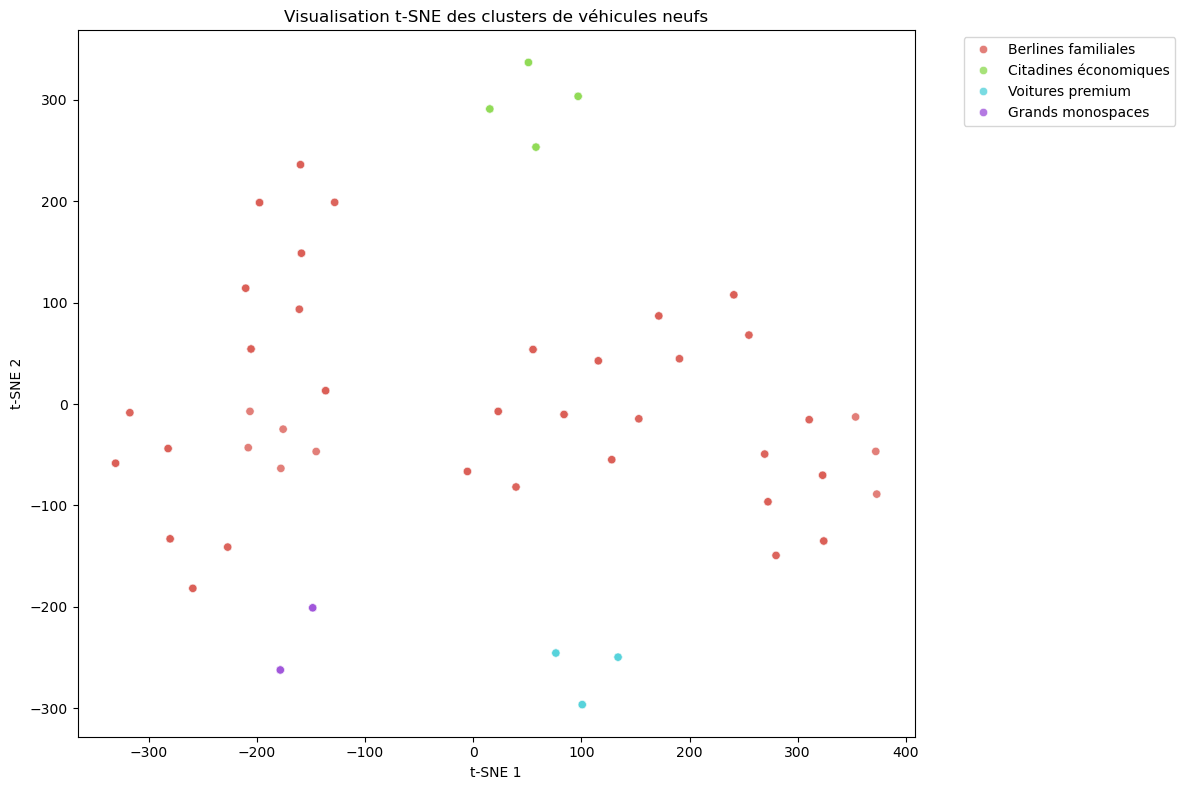

In [24]:
# 5. Visualisation avec t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=X_tsne[:, 0], y=X_tsne[:, 1],
    hue=catalogue_neuf['categorie'],
    palette=sns.color_palette("hls", k_optimal),
    legend="full",
    alpha=0.8
)
plt.title('Visualisation t-SNE des clusters de véhicules neufs')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [26]:
catalogue_neuf.to_csv('Catalogue_categorise.csv', index=False)
print("\nRésultats sauvegardés dans 'Catalogue_categorise.csv'")


Résultats sauvegardés dans 'Catalogue_categorise.csv'


In [28]:
print(catalogue_neuf[catalogue_neuf['categorie']=="Voitures premium"])

         marque              nom  puissance longueur  nbPlaces  nbPortes  \
21   Volkswagen      Polo 1.2 6V         55   courte         5         3   
22   Volkswagen      Polo 1.2 6V         55   courte         5         3   
25   Volkswagen      Polo 1.2 6V         55   courte         5         3   
27   Volkswagen      Polo 1.2 6V         55   courte         5         3   
28   Volkswagen      Polo 1.2 6V         55   courte         5         3   
165      Lancia  Ypsilon 1.4 16V         90   courte         5         3   
167      Lancia  Ypsilon 1.4 16V         90   courte         5         3   
168      Lancia  Ypsilon 1.4 16V         90   courte         5         3   
169      Lancia  Ypsilon 1.4 16V         90   courte         5         3   
172      Lancia  Ypsilon 1.4 16V         90   courte         5         3   
220    Daihatsu        Cuore 1.0         58   courte         5         3   
221    Daihatsu        Cuore 1.0         58   courte         5         3   
222    Daiha

In [30]:
#fusion catalogue ,immarticulations et clients
immatriculations=pd.read_csv("C:/Users/hp/Documents/Warehouse&BI/projet_data_mining/Immatriculations_small.csv",encoding="latin1")
# Jointure entre les données d'immatriculations et le catalogue avec les clusters
immatriculations_cat = pd.merge(immatriculations, catalogue_neuf[['marque', 'nom', 'categorie']],
                                 on=['marque', 'nom'], how='left')





In [32]:
print(immatriculations_cat.head())

  immatriculation marque         nom  puissance longueur  nbPlaces  nbPortes  \
0      3467 SB 72   Seat  Toledo 1.6        102   longue         5         5   
1      3467 SB 72   Seat  Toledo 1.6        102   longue         5         5   
2      3467 SB 72   Seat  Toledo 1.6        102   longue         5         5   
3      3467 SB 72   Seat  Toledo 1.6        102   longue         5         5   
4      3467 SB 72   Seat  Toledo 1.6        102   longue         5         5   

  couleur  occasion   prix            categorie  
0    bleu     False  18880  Berlines familiales  
1    bleu     False  18880  Berlines familiales  
2    bleu     False  18880  Berlines familiales  
3    bleu     False  18880  Berlines familiales  
4    bleu     False  18880  Berlines familiales  


In [34]:
# Chargement des données
clients = pd.read_csv("C:/Users/hp/Documents/Cour_M1/Warehouse&BI/projet_data_mining/Clients.csv",encoding="latin1")

# Jointure sur la colonne "immatriculation"
clients_vehicules = pd.merge(clients, immatriculations_cat, on="immatriculation", how="left")


In [36]:

print(clients_vehicules[clients_vehicules['categorie']=="Voitures premium"])

       age sexe taux situationFamiliale nbEnfantsAcharge 2eme voiture  \
110     49    M  167        Célibataire                0        false   
111     49    M  167        Célibataire                0        false   
112     49    M  167        Célibataire                0        false   
113     49    M  167        Célibataire                0        false   
114     49    M  167        Célibataire                0        false   
...     ..  ...  ...                ...              ...          ...   
499975  40    M  211        Célibataire                0        false   
499976  40    M  211        Célibataire                0        false   
499977  40    M  211        Célibataire                0        false   
499978  40    M  211        Célibataire                0        false   
499979  40    M  211        Célibataire                0        false   

       immatriculation      marque          nom  puissance longueur  nbPlaces  \
110         5697 FF 58  Volkswagen  Polo 1